In [1]:
import numpy
from math import pi
%matplotlib inline
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm

In [2]:
from laplace_helper import plot_3D

In [3]:
# Parameters
nx = 41
ny = 41
xmin = 0.
xmax = 1.
ymin = 0.
ymax = 1.

l1_target = 1e-6

# Spacing
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)

# Mesh
x  = numpy.linspace(xmin,xmax,nx)
y  = numpy.linspace(ymin,ymax,ny)
X,Y = numpy.meshgrid(x,y)

# Initialization
p_i = numpy.zeros((ny,nx))
u_j = numpy.zeros((ny,nx))
u_j[-1,1:-1] = 1.0
u_i = 1.0
coef = (-1./(2.*(dy**2)))
b_i = numpy.zeros((ny,nx))
b_i[1, 1:-1] = (coef*((8.*p_i[1, 1:-1]) - p_i[2, 1:-1])) - ((3. * u_i) / dy)
b_i[-2, 1:-1] = (coef*((8.*p_i[-2, 1:-1]) - p_i[-3, 1:-1]))
b_i[1:-1, -2] = (coef*((8.*p_i[1:-1, -2]) - p_i[1:-1, -3]))
b_i[1:-1, 1] = (coef*((8.*p_i[1:-1, 1]) - p_i[1:-1, 2]))

In [4]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm


def steepest_descent_2d(p, b, dx, dy, l1_target):
    '''
    Performs steepest descent relaxation
    Assumes Dirichlet boundary conditions p=0
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l1_target: float
        iteration exit criterion
        
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    ny, nx = p.shape
    r  = numpy.zeros((ny,nx)) # residual
    Ar  = numpy.zeros((ny,nx)) # to store result of matrix multiplication
    
    l1_norm_o = 1
    l1_norm_p = 1
    iterations = 0
    l1_conv_o = []
    l1_conv_p = []
    
    # Iterations
    while l1_norm_o > l1_target or l1_norm_p > l1_target:

        pd = p.copy()
        
        r[1:-1,1:-1] = -b[1:-1,1:-1]*dx**2 + 4*pd[1:-1,1:-1] - \
            pd[1:-1,2:] - pd[1:-1,:-2] - pd[2:, 1:-1] - pd[:-2, 1:-1]
        
        Ar[1:-1,1:-1] = -4*r[1:-1,1:-1]+r[1:-1,2:]+r[1:-1,:-2]+\
            r[2:, 1:-1] + r[:-2, 1:-1]

        rho = numpy.sum(r*r)
        sigma = numpy.sum(r*Ar)
        alpha = rho/sigma

        p = pd + alpha*r
        
        # BCs are automatically enforced
        
        bd = b.copy()
        # Calculating Omega values
        b[1:-1,1:-1] = 0.25 * (bd[1:-1,2:] + bd[1:-1,:-2] + bd[2:,1:-1] + bd[:-2,1:-1])
        
        # BCs for Omega
        b[-1, 1:-1] = (coef*((8.*p[-2, 1:-1]) - p[-3, 1:-1])) - ((3. * u_j[-1,1:-1]) / dy)
        b[0, 1:-1] = (coef*((8.*p[1, 1:-1]) - p[2, 1:-1]))
        b[1:-1, -1] = (coef*((8.*p[1:-1, -2]) - p[1:-1, -3]))
        b[1:-1, 0] = (coef*((8.*p[1:-1, 1]) - p[1:-1, 2]))
        
        l1_norm_p = L1norm(pd,p)
        l1_norm_o = L1norm(bd,b)
        
        iterations += 1
        
    
    print('Number of SD iterations: {0:d}'.format(iterations))
    return p, b    

In [5]:
p, b = steepest_descent_2d(p_i.copy(), b_i.copy(), dx, dy, l1_target)

Number of SD iterations: 3993


In [ ]:
numpy.round(p[32,::8], 4)

In [ ]:
numpy.round(numpy.amax(abs(p)),4)

In [ ]:
numpy.round(numpy.amax(abs(b)),4)

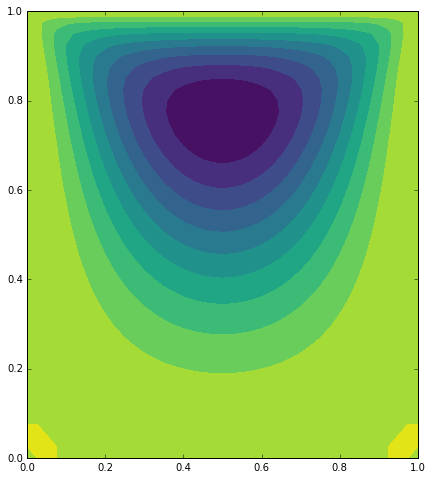

In [6]:
fig = pyplot.figure(figsize=(7,8))
pyplot.contourf(x,y,p,10,cmap=cm.viridis)

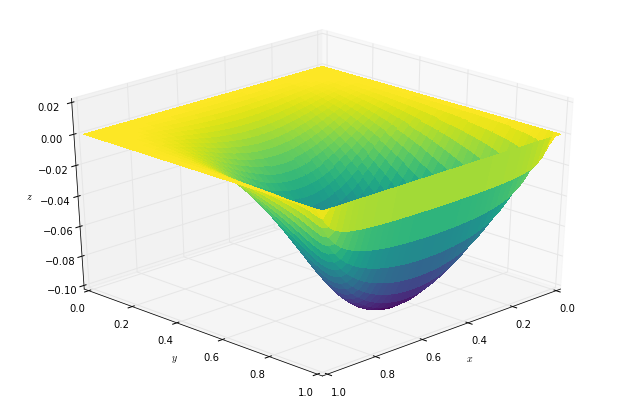

In [7]:
plot_3D(x,y,p)